# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Alda Ellsa Faradilla
- **Email:** aldaellsaf@gmail.com
- **ID Dicoding:** aldaellsa

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Kota tujuan pengiriman paket manakah yang memiliki waktu pengiriman terlama?
- Pertanyaan 2 : Kategori produk apa yang menghasilkan pendapatan tertinggi?
- Pertanyaan 3 : Kota manakah yang menghasilkan pendapatan paling tinggi?
- Pertanyaan 4 : Bagaimana pengelompokkan pelanggan berdasarkan keterkinian pembelian terakhir, frekuensi pembelian, dan jumlah total yang dibelanjakan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import warnings
warnings.filterwarnings("ignore")
import datetime as dt

## Data Wrangling

### Download Dataset

In [3]:
# Download Data from ID Google Drive
!gdown 1i-XbmzH8Kugi6aUXhQKk9DuccI78S06y

Downloading...
From (original): https://drive.google.com/uc?id=1i-XbmzH8Kugi6aUXhQKk9DuccI78S06y
From (redirected): https://drive.google.com/uc?id=1i-XbmzH8Kugi6aUXhQKk9DuccI78S06y&confirm=t&uuid=79a20fb5-21ca-4bdf-820e-0ad8ef0b4d1d
To: /content/Brazilian E-Commerce.zip
100% 46.0M/46.0M [00:01<00:00, 25.1MB/s]


In [4]:
# Unzip File Dataset
!unzip "/content/Brazilian E-Commerce.zip" -d "./"

Archive:  /content/Brazilian E-Commerce.zip
  inflating: ./Brazilian E-Commerce/olist_customers_dataset.csv  
  inflating: ./Brazilian E-Commerce/olist_geolocation_dataset.csv  
  inflating: ./Brazilian E-Commerce/olist_orders_dataset.csv  
  inflating: ./Brazilian E-Commerce/olist_order_items_dataset.csv  
  inflating: ./Brazilian E-Commerce/olist_order_payments_dataset.csv  
  inflating: ./Brazilian E-Commerce/olist_order_reviews_dataset.csv  
  inflating: ./Brazilian E-Commerce/olist_products_dataset.csv  
  inflating: ./Brazilian E-Commerce/olist_sellers_dataset.csv  
  inflating: ./Brazilian E-Commerce/product_category_name_translation.csv  


### Membaca Dataset

In [5]:
# Dataset Pelanggan
pelanggan = pd.read_csv("/content/Brazilian E-Commerce/olist_customers_dataset.csv")
print(pelanggan.shape)
pelanggan.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
# Dataset Order Items
items = pd.read_csv("/content/Brazilian E-Commerce/olist_order_items_dataset.csv")
print(items.shape)
items.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# Dataset Pesanan
pesanan = pd.read_csv("/content/Brazilian E-Commerce/olist_orders_dataset.csv")
print(pesanan.shape)
pesanan.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# Dataset Pembayaran
pembayaran = pd.read_csv("/content/Brazilian E-Commerce/olist_order_payments_dataset.csv")
print(pembayaran.shape)
pembayaran.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
# Dataset Produk
produk = pd.read_csv("/content/Brazilian E-Commerce/olist_products_dataset.csv")
print(produk.shape)
produk.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
# Dataset Sellers
sellers = pd.read_csv("/content/Brazilian E-Commerce/olist_sellers_dataset.csv")
print(sellers.shape)
sellers.head()

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
# Dataset Kategori Produk Translation
kategori_produk = pd.read_csv("/content/Brazilian E-Commerce/product_category_name_translation.csv")
print(kategori_produk.shape)
kategori_produk.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
# Dataset Geolocation
geolocation = pd.read_csv("/content/Brazilian E-Commerce/olist_geolocation_dataset.csv")
print(geolocation.shape)
geolocation.head()

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [13]:
# Menghapus Kolom yang Tidak Digunakan
geolocation = geolocation.drop(columns = ["geolocation_city","geolocation_state"])
geolocation = geolocation.drop_duplicates(subset=["geolocation_zip_code_prefix"])

### Gathering Data

In [14]:
# Menggabungkan Data Produk dengan Data Kategori Produk Translation
product = produk.merge(kategori_produk, left_on="product_category_name", right_on="product_category_name",how="left")
df_produk = product[["product_id","product_category_name_english","product_category_name"]]
print(df_produk.shape)
df_produk.head()

(32951, 3)


,product_id,product_category_name_english,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,art,artes
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,baby,bebes
4,9dc1a7de274444849c219cff195d0b71,housewares,utilidades_domesticas


In [15]:
# Menggabungkan Data Items dengan Data Produk menjadi Data Order Items
order_items = items.drop(columns = ["shipping_limit_date"])
order_items = items.merge(df_produk, left_on="product_id", right_on="product_id",how="left")

# Menggabungkan Data Items dengan Seller
order_items = order_items.merge(sellers, left_on="seller_id", right_on="seller_id",how="left")

# Menggabungkan Order Items dengan Geolocation
order_items = order_items.merge(geolocation, left_on="seller_zip_code_prefix", right_on="geolocation_zip_code_prefix",how="left", validate = "m:1")
print(order_items.shape)
order_items.head()

(112650, 15)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff,27277,volta redonda,SP,27277.0,-22.498183,-44.123614
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop,3471,sao paulo,SP,3471.0,-23.566258,-46.518417
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,moveis_decoracao,37564,borda da mata,MG,37564.0,-22.264094,-46.158564
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,perfumaria,14403,franca,SP,14403.0,-20.548228,-47.395897
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,ferramentas_jardim,87900,loanda,PR,87900.0,-22.931427,-53.133759


In [16]:
# Menggabungkan Pesanan dengan Pembayaran
payments = pembayaran.drop(columns = ["payment_sequential","payment_installments"])
orders = pesanan.merge(payments, left_on="order_id", right_on="order_id",how="left")

# Menggabungkan Pesanan dengan Pelanggan
customer = pelanggan.drop(columns = [])
orders = orders.merge(customer, left_on="customer_id", right_on="customer_id",how="left")

# Menggabungkan Pelanggan dengan Geolocation
orders = orders.merge(geolocation, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix",how="left")

# Mencetak Tabel Pesanan
print(orders.shape)
orders.head()

(103887, 17)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,voucher,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,47813.0,-12.169860,-44.988369
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,credit_card,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,75265.0,-16.746337,-48.514624


### Assessing Data

In [17]:
# Menilai Data Order Items
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name_english  111023 non-null  object 
 8   product_category_name          111047 non-null  object 
 9   seller_zip_code_prefix         112650 non-null  int64  
 10  seller_city                    112650 non-null  object 
 11  seller_state                   112650 non-null  object 
 12  geolocation_zip_code_prefix   

In [18]:
# Mengetahui Missing Value
order_items.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name_english    1627
product_category_name            1603
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
geolocation_zip_code_prefix       253
geolocation_lat                   253
geolocation_lng                   253
dtype: int64

In [19]:
# Mengetahui Jumlah Data Order Items yang Terduplikasi
print("Jumlah duplikasi: ", order_items.duplicated().sum())
order_items.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value,seller_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,112650.000000,112650.000000,112650.000000,112650.000000,112397.000000,112397.000000,112397.000000
mean,1.197834,120.653739,19.990320,24439.170431,24435.840191,-22.800558,-47.235919
std,0.705124,183.633928,15.806405,27596.030909,27593.085486,2.697063,2.341211
min,1.000000,0.850000,0.000000,1001.000000,1001.000000,-36.605374,-67.809656
25%,1.000000,39.900000,13.080000,6429.000000,6429.000000,-23.610305,-48.831547
50%,1.000000,74.990000,16.260000,13568.000000,13568.000000,-23.422313,-46.747050
75%,1.000000,134.900000,21.150000,27930.000000,27345.000000,-21.766477,-46.518082
max,21.000000,6735.000000,409.680000,99730.000000,99730.000000,-2.546079,-34.847856


In [20]:
# Menilai Data Orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103887 non-null  object 
 1   customer_id                    103887 non-null  object 
 2   order_status                   103887 non-null  object 
 3   order_purchase_timestamp       103887 non-null  object 
 4   order_approved_at              103712 non-null  object 
 5   order_delivered_carrier_date   101999 non-null  object 
 6   order_delivered_customer_date  100755 non-null  object 
 7   order_estimated_delivery_date  103887 non-null  object 
 8   payment_type                   103886 non-null  object 
 9   payment_value                  103886 non-null  float64
 10  customer_unique_id             103887 non-null  object 
 11  customer_zip_code_prefix       103887 non-null  int64  
 12  customer_city                 

In [21]:
# Mengetahui Missing Value
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_type                        1
payment_value                       1
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
geolocation_zip_code_prefix       287
geolocation_lat                   287
geolocation_lng                   287
dtype: int64

In [22]:
# Mengetahui Jumlah Data Orders yang Terduplikasi
print("Jumlah duplikasi: ", orders.duplicated().sum())
orders.describe()

Jumlah duplikasi:  615


,payment_value,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,103886.000000,103887.000000,103600.000000,103600.000000,103600.000000
mean,154.100380,35072.353490,34993.025290,-21.182725,-46.161546
std,217.494064,29743.416343,29728.828785,5.619097,4.072123
min,0.000000,1003.000000,1003.000000,-36.605374,-72.666706
25%,56.790000,11367.500000,11325.000000,-23.587054,-48.080610
50%,100.000000,24360.000000,24342.000000,-22.925319,-46.628693
75%,171.837500,58418.000000,58102.250000,-20.146615,-43.580531
max,13664.080000,99990.000000,99990.000000,42.184003,-8.577855


### Cleaning Data

In [23]:
# Mengubah Tipe Data Pada shipping_limit_date Menjadi Datetime di oreder_items
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])
order_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   seller_id                      112650 non-null  object        
 4   shipping_limit_date            112650 non-null  datetime64[ns]
 5   price                          112650 non-null  float64       
 6   freight_value                  112650 non-null  float64       
 7   product_category_name_english  111023 non-null  object        
 8   product_category_name          111047 non-null  object        
 9   seller_zip_code_prefix         112650 non-null  int64         
 10  seller_city                    112650 non-null  object        
 11  

In [24]:
# Missing Value Pada Kolom product_category_name_english Pada Data order_items
x = order_items.loc[order_items["product_category_name"].notna() & order_items["product_category_name_english"].isna()]
set(x["product_category_name"])

{'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'}

In [25]:
# Menangani Inaccurate Value
order_items["product_category_name"].fillna("not defined", inplace = True)
order_items["product_category_name_english"].fillna("not defined", inplace = True)

order_items["product_category_name_english"] = np.where(order_items["product_category_name"] == "pc_gamer", "PC Gaming", order_items["product_category_name_english"])
order_items["product_category_name_english"] = np.where(order_items["product_category_name"] == "portateis_cozinha_e_preparadores_de_alimentos", "portable kitchen food preparers", order_items["product_category_name_english"])

In [26]:
# Melihat Kembali Missing Value Pada order_items
order_items.isna().sum()

order_id                           0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name_english      0
product_category_name              0
seller_zip_code_prefix             0
seller_city                        0
seller_state                       0
geolocation_zip_code_prefix      253
geolocation_lat                  253
geolocation_lng                  253
dtype: int64

In [27]:
# Mengubah Tipe Data di Data Orders
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_approved_at"] = pd.to_datetime(orders["order_approved_at"])
orders["order_delivered_carrier_date"] = pd.to_datetime(orders["order_delivered_carrier_date"])
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])
orders["order_status"] = orders["order_status"].astype("category")
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103887 non-null  object        
 1   customer_id                    103887 non-null  object        
 2   order_status                   103887 non-null  category      
 3   order_purchase_timestamp       103887 non-null  datetime64[ns]
 4   order_approved_at              103712 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101999 non-null  datetime64[ns]
 6   order_delivered_customer_date  100755 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103887 non-null  datetime64[ns]
 8   payment_type                   103886 non-null  object        
 9   payment_value                  103886 non-null  float64       
 10  customer_unique_id             103887 non-null  object        
 11  

In [28]:
# Menangani Inaccurate Value
orders.loc[orders["order_status"] == "shipped"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
49,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,boleto,22.36,08fb46d35bb3ab4037202c23592d1259,13215,jundiai,SP,13215.0,-23.175897,-46.886594
161,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07,boleto,69.12,528b011eb7fab3d59c336cc7248eed3a,38600,paracatu,MG,38600.0,-17.211338,-46.886436
169,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08,credit_card,63.79,10669e874b7ddaab97d6d539578576d7,54762,camaragibe,PE,54762.0,-8.026146,-34.975079
241,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13,credit_card,240.23,7eb6b25c03556dfd2a2ee982f42074c2,91450,porto alegre,RS,91450.0,-30.047581,-51.134612
314,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03,credit_card,865.01,1c13e7a690e418f5a133c8a219b5a124,20910,rio de janeiro,RJ,20910.0,-22.899783,-43.228535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103196,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaT,2018-08-03,boleto,121.90,19623b03a989f84045b914cc36ee555c,25942,guapimirim,RJ,25942.0,-22.595404,-43.012676
103354,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaT,2018-07-26,credit_card,280.42,86cf122367cb1aa65d2ba235c4f7bef9,8270,sao paulo,SP,8270.0,-23.563363,-46.459684
103543,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24,credit_card,9.31,8823bc1bf8b46bec53f2b6e7c5d0a8c0,49030,aracaju,SE,49030.0,-10.970165,-37.061644
103544,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaT,2018-07-24,voucher,48.63,8823bc1bf8b46bec53f2b6e7c5d0a8c0,49030,aracaju,SE,49030.0,-10.970165,-37.061644


In [29]:
# Memisahkan Kolom
orders = orders.dropna(subset = ["payment_type","payment_value"])

# Mengetahui Jumlah Data Orders yang Terduplikasi
orders = orders.drop_duplicates()
print("Jumlah duplikasi: ", orders.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

### Explore Data Order Items

In [30]:
order_items["year"] = orders["order_purchase_timestamp"].dt.strftime("%Y")
order_items["month"] = orders["order_purchase_timestamp"].dt.strftime("%m-%Y")
order_items["year_month"] = orders["order_purchase_timestamp"].dt.to_period("M").astype("object")
order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,product_category_name,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,year,month,year_month
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650,112650,112650.000000,112650,112650,112397.000000,112397.000000,112397.000000,103271,103271,103271
unique,98666,NaN,32951,3095,93318,NaN,NaN,74,74,NaN,611,23,NaN,NaN,NaN,3,25,25
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,bed_bath_table,cama_mesa_banho,NaN,sao paulo,SP,NaN,NaN,NaN,2018,11-2017,2017-11
freq,21,NaN,527,2033,21,NaN,NaN,11115,11115,NaN,27983,80342,NaN,NaN,NaN,55738,7816,7816
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,NaN,NaN,24439.170431,NaN,NaN,24435.840191,-22.800558,-47.235919,NaN,NaN,NaN
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,NaN,NaN,27596.030909,NaN,NaN,27593.085486,2.697063,2.341211,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN,1001.000000,NaN,NaN,1001.000000,-36.605374,-67.809656,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN,6429.000000,NaN,NaN,6429.000000,-23.610305,-48.831547,NaN,NaN,NaN


In [31]:
# Kolom Produk dengan Harga
order_items.groupby(by="product_category_name_english").agg({
    "product_id": "count",
    "price": ["max", "min", "mean", "std"]
})

order_items.groupby(by="product_category_name_english").product_id.count().sort_values(ascending=False)

product_category_name_english
bed_bath_table               11115
health_beauty                 9670
sports_leisure                8641
furniture_decor               8334
computers_accessories         7827
                             ...  
cds_dvds_musicals               14
la_cuisine                      14
PC Gaming                        9
fashion_childrens_clothes        8
security_and_services            2
Name: product_id, Length: 74, dtype: int64

In [32]:
# Kolom Seller dengan Pesanan
order_items.groupby(by="seller_id").agg({
    "order_id" : "nunique",
})

order_items.groupby(by="seller_id").order_id.nunique().sort_values(ascending=False)

seller_id
6560211a19b47992c3666cc44a7e94c0    1854
4a3ca9315b744ce9f8e9374361493884    1806
cc419e0650a3c5ba77189a1882b7556a    1706
1f50f920176fa81dab994f9023523100    1404
da8622b14eb17ae2831f4ac5b9dab84a    1314
                                    ... 
ceb7b4fb9401cd378de7886317ad1b47       1
cecd97bc34ed8330bd4cd15713eda670       1
5b92bfa4120daa27c574daa2e386c693       1
5aaa890629f83706d8d9bfecd8377c1c       1
7d81e74a4755b552267cd5e081563028       1
Name: order_id, Length: 3095, dtype: int64

In [33]:
# Melihat Jumlah Penjualan Produk Setiap Bulan
orders["month"] = orders["order_purchase_timestamp"].dt.strftime("%m-%Y")
orders.groupby(by="month").order_id.nunique().sort_values(ascending=False)

month
11-2017    7544
01-2018    7269
03-2018    7211
04-2018    6939
05-2018    6873
02-2018    6728
08-2018    6512
07-2018    6292
06-2018    6167
12-2017    5673
10-2017    4631
08-2017    4331
09-2017    4285
07-2017    4026
05-2017    3700
06-2017    3245
03-2017    2682
04-2017    2404
02-2017    1780
01-2017     800
10-2016     324
09-2018      16
10-2018       4
09-2016       3
12-2016       1
Name: order_id, dtype: int64

### Explore Data Orders

In [34]:
orders["hari_pengiriman"] = (orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"]).dt.days
orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,month,hari_pengiriman
count,103271,103271,103271,103271,103106,101410,100172,103271,103271,103271.000000,103271,103271.000000,103271,103271,102984.000000,102984.000000,102984.000000,103271,100171.000000
unique,99440,99440,8,98874,90732,81017,95663,458,5,NaN,96095,NaN,4119,27,NaN,NaN,NaN,25,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,delivered,2017-04-20 12:45:34,2017-04-22 09:10:13,2018-05-09 15:48:00,2017-06-22 16:04:46,2017-12-20 00:00:00,credit_card,NaN,8af7ac63b2efbcbd88e5b11505e8098a,NaN,sao paulo,SP,NaN,NaN,NaN,11-2017,NaN
freq,25,25,100174,25,25,47,22,560,76782,NaN,25,NaN,16104,43332,NaN,NaN,NaN,7816,NaN
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154.845047,NaN,35088.683909,NaN,NaN,35008.926717,-21.186564,-46.164686,NaN,8.892574
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.897537,NaN,29750.470243,NaN,NaN,29735.861853,5.618367,4.070686,NaN,8.757410
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1003.000000,NaN,NaN,1003.000000,-36.605374,-72.666706,NaN,-17.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.490000,NaN,11380.000000,NaN,NaN,11335.000000,-23.587054,-48.083034,NaN,4.000000


In [35]:
# Melihat Pengiriman Paket yang Paling Lama
delivery_time = orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders["delivery_time"] = round(delivery_time/86400)

orders = orders.sort_values(by="delivery_time", ascending=False)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,month,hari_pengiriman,delivery_time
58150,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,credit_card,162.25,eb21169c3153a2b507fc7e76d561ff14,22723,rio de janeiro,RJ,22723.0,-22.915127,-43.409880,02-2018,205.0,205.0
20446,ca07593549f1816d26a572e06dc1eab6,75683a92331068e2d281b11a7866ba44,delivered,2017-02-21 23:31:27,2017-02-23 02:35:15,2017-03-08 13:47:46,2017-09-19 14:36:39,2017-03-22,boleto,245.68,4a2519b6991378f6f2ce5ed22d308f03,29890,montanha,ES,29890.0,-18.125973,-40.359526,02-2017,195.0,195.0
93078,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06,credit_card,457.65,3c2564d42f7ddd8b7576f0dd9cb1b4c5,49400,lagarto,SE,49400.0,-10.915875,-37.673278,03-2017,194.0,194.0
73379,2fb597c2f772eca01b1f5c561bf6cc7b,217906bc11a32c1e470eb7e08584894b,delivered,2017-03-08 18:09:02,2017-03-08 18:09:02,2017-03-13 08:54:02,2017-09-19 14:33:17,2017-04-17,credit_card,345.15,c6c0b794d3e4eb69cd85d1438a0db26e,64023,teresina,PI,64023.0,-5.130977,-42.782435,03-2017,190.0,190.0
64357,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,delivered,2017-03-07 23:59:51,2017-03-09 01:11:33,2017-03-15 13:00:08,2017-09-19 15:12:50,2017-04-07,credit_card,185.02,f0785d41d416fa827f24c4b95d066b69,66813,belem,PA,66813.0,-1.456082,-48.499975,03-2017,188.0,188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103723,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01,voucher,63.89,e90598185d2427a35e32ef241a5c04aa,11075,santos,SP,11075.0,-23.944502,-46.331243,08-2018,NaN,NaN
103754,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06,boleto,144.56,965191786b70912f793e4a777fd623cd,13050,campinas,SP,13050.0,-22.932218,-47.096790,01-2018,NaN,NaN
103791,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27,voucher,107.13,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,5344.0,-23.554379,-46.745775,09-2018,NaN,NaN
103792,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,credit_card,195.91,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,22723.0,-22.915127,-43.409880,08-2017,NaN,NaN


In [36]:
# Menggabungkan Pelanggan dengan Seller
customer = orders[["customer_city","customer_state","hari_pengiriman","order_id","customer_id","customer_zip_code_prefix","geolocation_lat","geolocation_lng"]]
seller = order_items[["order_id","seller_id","seller_city","seller_state","seller_zip_code_prefix","freight_value","geolocation_lat","geolocation_lng"]]
customer_seller = customer.merge(seller, left_on="order_id", right_on="order_id",how="left")
customer_seller.rename(columns = {"geolocation_lat_x":"geolocation_lat_cust", "geolocation_lat_y":"geolocation_lat_seller", "geolocation_lng_x":"geolocation_lng_cust","geolocation_lng_y":"geolocation_lng_seller"}, inplace = True)
customer_seller.head()

,customer_city,customer_state,hari_pengiriman,order_id,customer_id,customer_zip_code_prefix,geolocation_lat_cust,geolocation_lng_cust,seller_id,seller_city,seller_state,seller_zip_code_prefix,freight_value,geolocation_lat_seller,geolocation_lng_seller
0,rio de janeiro,RJ,205.0,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,22723,-22.915127,-43.409880,7a67c85e85bb2ce8582c35f2203ad736,sao paulo,SP,3426.0,17.26,-23.554079,-46.533242
1,montanha,ES,195.0,ca07593549f1816d26a572e06dc1eab6,75683a92331068e2d281b11a7866ba44,29890,-18.125973,-40.359526,2a1348e9addc1af5aaa619b1a3679d6b,belo horizonte,MG,30494.0,15.78,-19.956617,-43.968436
2,lagarto,SE,194.0,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,49400,-10.915875,-37.673278,c847e075301870dd144a116762eaff9a,uberaba,MG,38022.0,27.75,-19.762887,-47.938586
3,teresina,PI,190.0,2fb597c2f772eca01b1f5c561bf6cc7b,217906bc11a32c1e470eb7e08584894b,64023,-5.130977,-42.782435,a7f13822ceb966b076af67121f87b063,itaquaquecetuba,SP,8577.0,105.19,-23.482623,-46.374490
4,belem,PA,188.0,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,66813,-1.456082,-48.499975,2a1348e9addc1af5aaa619b1a3679d6b,belo horizonte,MG,30494.0,25.12,-19.956617,-43.968436


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota tujuan pengiriman paket manakah yang memiliki waktu pengiriman terlama?

In [37]:
pengiriman = customer_seller.groupby(["seller_city", "customer_city"])["hari_pengiriman"].max()
pengiriman = pengiriman.sort_values(ascending=False).reset_index()
pengiriman.head()

,seller_city,customer_city,hari_pengiriman
0,sao paulo,rio de janeiro,205.0
1,belo horizonte,montanha,195.0
2,uberaba,lagarto,194.0
3,itaquaquecetuba,teresina,190.0
4,belo horizonte,belem,188.0


> Diperoleh kota tujuan dengan waktu pengiriman terlama adalah Kota Rio de Janeiro dengan lama pengiriman 205 hari





### Pertanyaan 2: Kategori produk apa yang menghasilkan pendapatan tertinggi?


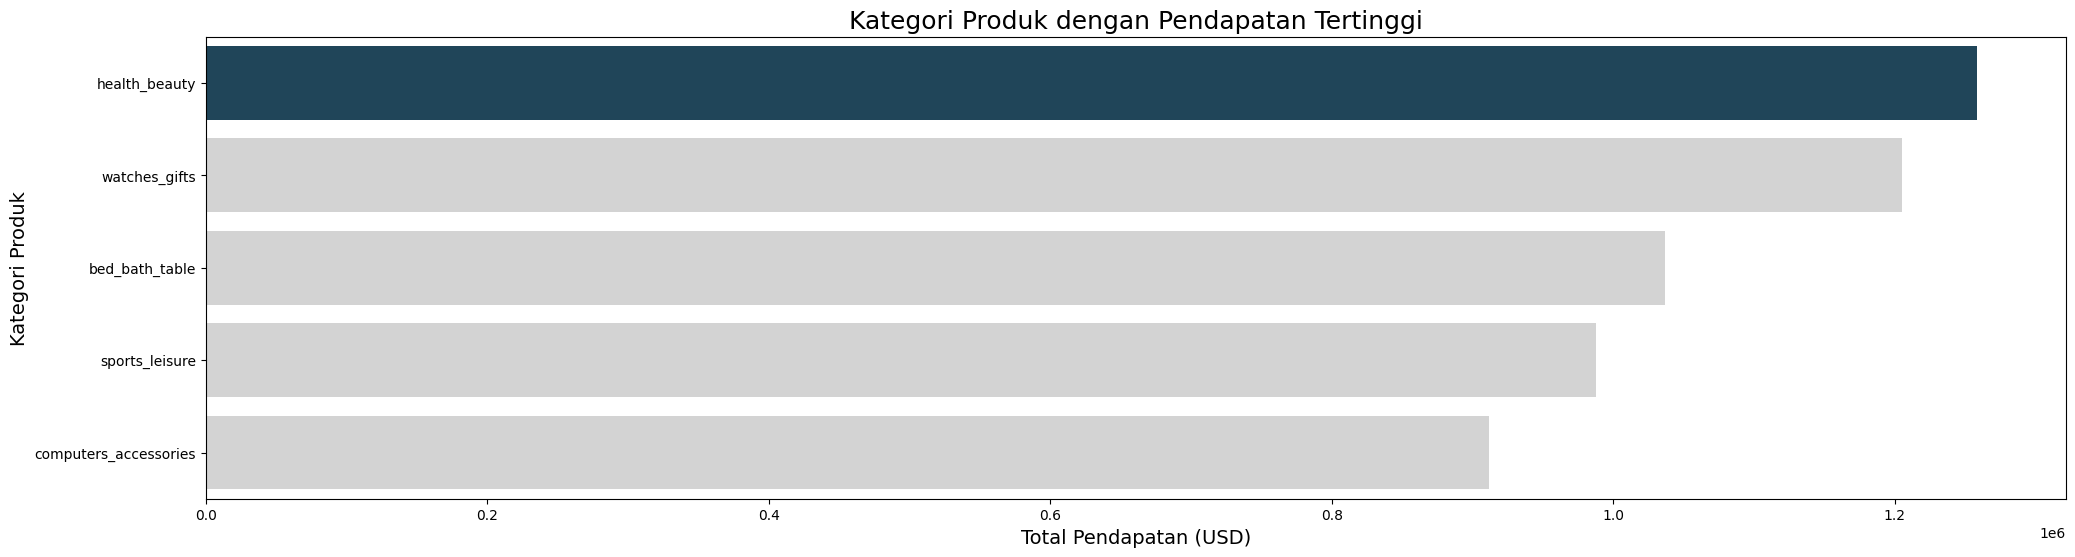

Total pendapatan tertinggi sebesar: 1258681.34


In [38]:
pendapatan = order_items.groupby("product_category_name_english")["price"].sum().sort_values(ascending=False).reset_index()
pendapatan = pendapatan.rename(columns={"product_category_name_english": "category", "price": "price"})


plt.figure(figsize=(24, 6))
colors = ["#164863", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="price", y="category", data = pendapatan.sort_values(by="price", ascending=False).head(5), palette=colors)
plt.ylabel("Kategori Produk", fontsize = 14)
plt.xlabel("Total Pendapatan (USD)", fontsize = 14)
plt.title("Kategori Produk dengan Pendapatan Tertinggi", loc="center", fontsize=18)

plt.show()

max_price = pendapatan["price"].max()
print("Total pendapatan tertinggi sebesar:", max_price)

> Diperoleh kategori produk health_beauty yang menghasilkan pendapatan tertinggi yaitu sebesar 1.258.681,34 USD



### Pertanyaan 3: Kota manakah yang menghasilkan pendapatan paling tinggi?

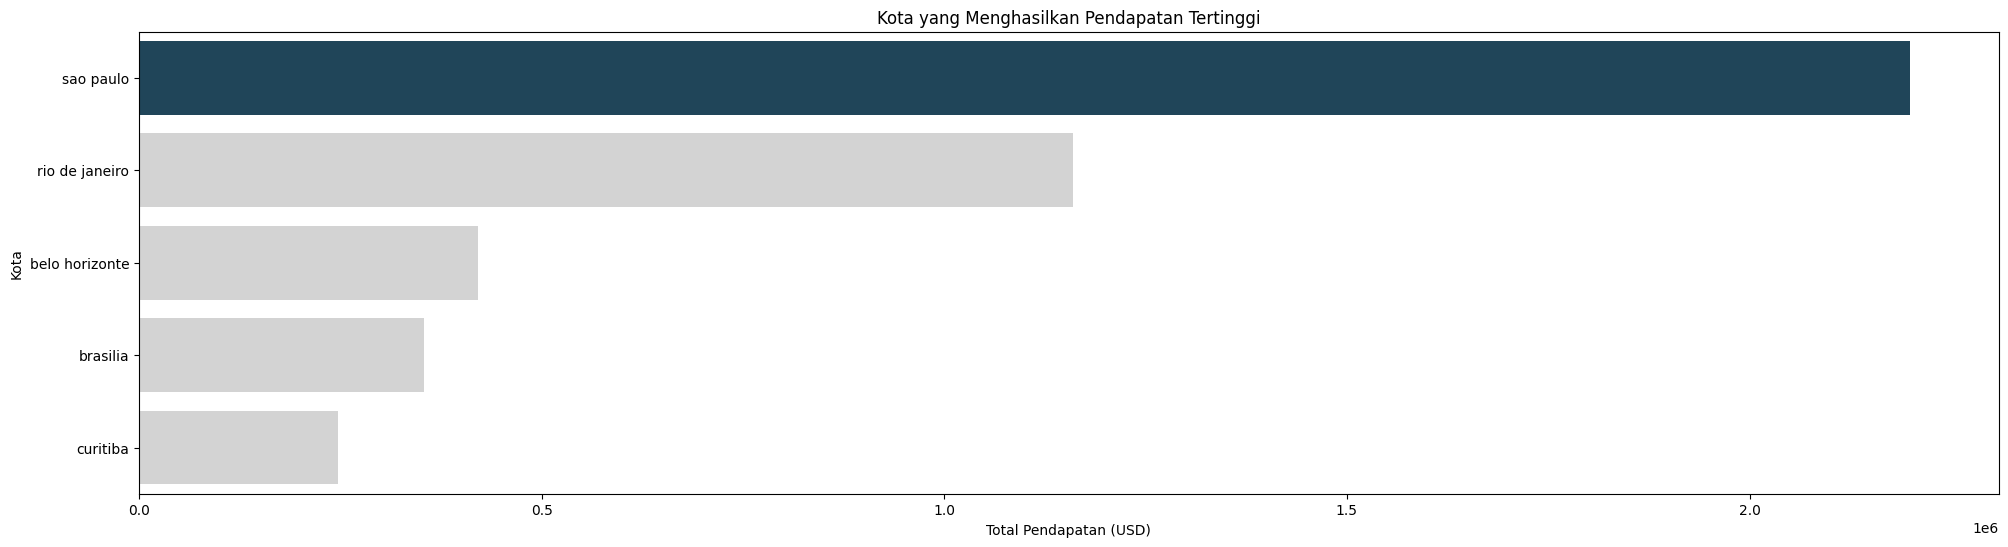

Total pendapatan tertinggi sebesar: 2199658.07


In [39]:
pendapatan_kota = orders.groupby("customer_city")["payment_value"].sum().reset_index().sort_values("payment_value", ascending = False).head(5)

plt.figure(figsize=(24, 6))
colors = ["#164863", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x = "payment_value", y = "customer_city", data = pendapatan_kota, palette = colors)

plt.xlabel("Total Pendapatan (USD)")
plt.ylabel("Kota")
plt.title("Kota yang Menghasilkan Pendapatan Tertinggi")
plt.show()

max_price = pendapatan_kota["payment_value"].max()
print("Total pendapatan tertinggi sebesar:", max_price)

> Diperoleh kota yang menghasilkan pendapatan tertinggi yaitu Kota Sao Paulo dengan hasil pendapatan sebesar 2.199.658,07 USD.


### Pertanyaan 4: Bagaimana pengelompokkan pelanggan berdasarkan pembelian terakhir, frekuensi pembelian, dan jumlah total uang yang dikeluarkan?

In [40]:
# Menggabungkan Items denggan Harga
harga = items.drop(columns = ["order_item_id","product_id",	"seller_id", "shipping_limit_date"])
orders = orders.merge(harga, left_on ="order_id", right_on= "order_id",how="left")

now = orders["order_approved_at"].max() + pd.Timedelta(days=1)

# Recency = pembelian terakhir
recency = orders.groupby("customer_id")["order_approved_at"].max().reset_index()
recency.columns = ["customer_id", "LastPurchaseDate"]
recency["Recency"] = (now - recency["LastPurchaseDate"]).dt.days

# Frequency = jumlah pembelian
frequency = orders.groupby("customer_id")["order_id"].count().reset_index()
frequency.columns = ["customer_id", "Frequency"]
frequency["customer_id"] = frequency["customer_id"].astype(object)

# Monetary = total uang yang dikeluarkan
monetary = orders.groupby("customer_id")["price"].sum().reset_index()
monetary.columns = ["customer_id", "Monetary"]

# Gabungan dataframe RFM
rfm = pd.merge(recency, frequency, on="customer_id")
rfm = pd.merge(rfm, monetary, on="customer_id")

print(rfm.head())
print(rfm.describe())

                        customer_id    LastPurchaseDate  Recency  Frequency  \
0  00012a2ce6f8dcda20d059ce98491703 2017-11-14 16:35:32    294.0          1   
1  000161a058600d5901f007fab4c27140 2017-07-16 09:55:12    415.0          1   
2  0001fd6190edaaf884bcaf3d49edf079 2017-02-28 11:15:20    553.0          1   
3  0002414f95344307404f0ace7a26f1d5 2017-08-17 03:10:27    383.0          1   
4  000379cdec625522490c315e70c7a9fb 2018-04-04 03:10:19    153.0          1   

   Monetary  
0     89.80  
1     54.90  
2    179.99  
3    149.90  
4     93.00  
            Recency     Frequency      Monetary
count  99280.000000  99440.000000  99440.000000
mean     246.473640      1.183890    142.035526
std      153.502732      0.664311    232.261238
min        1.000000      1.000000      0.000000
25%      122.000000      1.000000     45.900000
50%      228.000000      1.000000     88.900000
75%      356.000000      1.000000    151.900000
max      700.000000     34.000000  13440.000000


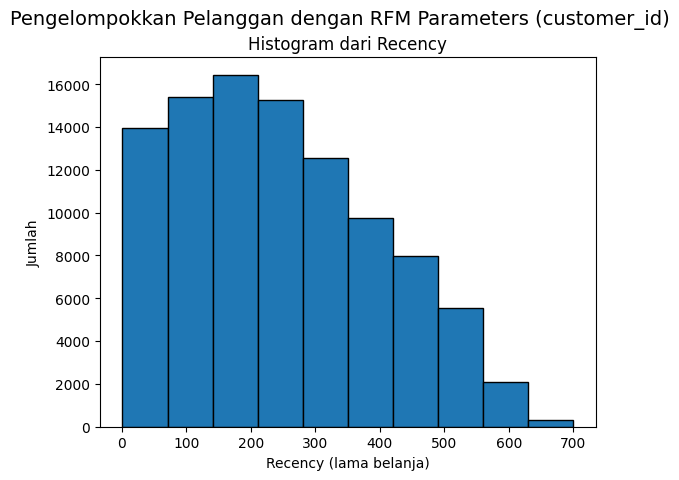

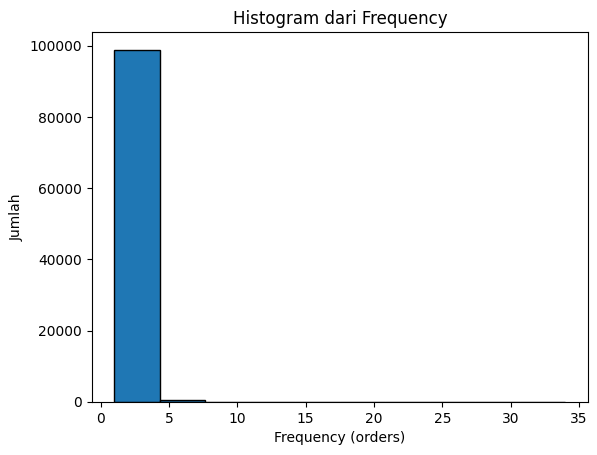

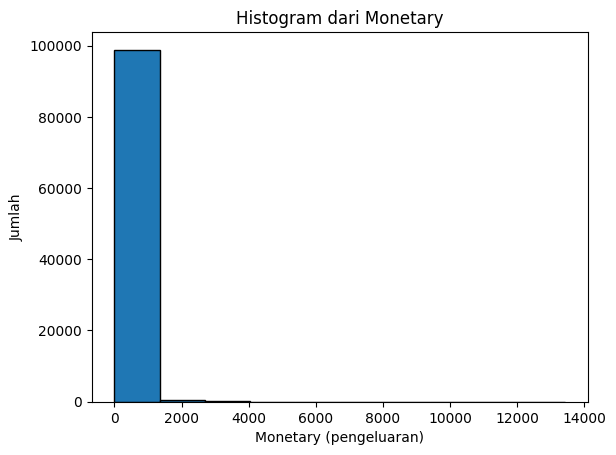

In [76]:
plt.suptitle("Pengelompokkan Pelanggan dengan RFM Parameters (customer_id)", fontsize=14)

# Membuat histogram kolom Recency
plt.hist(rfm["Recency"], bins=10, edgecolor="black", linewidth=1)
plt.xlabel("Recency (lama belanja)")
plt.ylabel("Jumlah")
plt.title("Histogram dari Recency")
plt.show()

# Membuat histogram kolom Frequency
plt.hist(rfm["Frequency"], bins=10, edgecolor="black", linewidth=1)
plt.xlabel("Frequency (orders)")
plt.ylabel("Jumlah")
plt.title("Histogram dari Frequency")
plt.show()

# Membuat histogram kolom Monetary
plt.hist(rfm["Monetary"], bins=10, edgecolor="black", linewidth=1)
plt.xlabel("Monetary (pengeluaran)")
plt.ylabel("Jumlah")
plt.title("Histogram dari Monetary")
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Kota tujuan pengiriman paket manakah yang memiliki waktu pengiriman terlama?

>  Dengan ditampilkannya tabel yang berisi dengan tiga kolom yaitu kolom kota penjual, kolom kota pelanggan, dan kolom hari pengiriman. Ditampilkan lima data dengan waktu pengiriman yang bervariasi antara 188 hari hingga 205 hari. Sehingga kota tujuan dalam pengiriman paket yang memiliki waktu pengiriman terlama adalah Kota Rio de Janeiro dengan lama pengiriman yaitu 205 hari.



- Conclution pertanyaan 2 : Kategori produk apa yang menghasilkan pendapatan tertinggi?

> Grafik batang yang ditampilkan berisi tentang membandingkan pendapatan total dalam USD dari lima kategori produk yang berbeda yaitu kategori health_beauty, watches_gifts, bed_bath_table, sports_leisure, dan computers_accessories. Dari grafik batang tersebut didapatkan bahwa kategori produk health_beauty memiliki pendapatan tertinggi dari semua kategori yang ditampilkan dengan total pendapatan sebesar 1.258.681,34 USD.





- Conclution pertanyaan 3 : Kota manakah yang menghasilkan pendapatan paling tinggi?

> Grafik batang yang ditampilkan berisi tentang perbandingan pendapatan antara beberapa kota yang ada di Brasil. Terdapat lima kota yang ditampilkan dalam grafik tersebut yaitu Kota Sao Paulo, Kota Rio de Janeiro, Kota Belo Horizonte, Kota Brasilia, dan Kota Curitiba. Dari visualisasi grafik batang tersebut diperoleh bahwa Kota Sao Paulo menjadi kota yang menghasilkan pendapatan tertinggi yaitu sebesar 2.199.658,07 USD.




- Conclution pertanyaan 4 : Bagaimana pengelompokkan pelanggan berdasarkan keterkinian pembelian terakhir, frekuensi pembelian, dan jumlah total yang dibelanjakan?

> Berdasarkan visualisasi grafik batang yang ditampilkan, pengelompokkan pelanggan berdasarkan parameter RFM(Recency, Frequency, Monetary) didapatkan bahwa:
1. Histogram recency menunjukkan bahwa sebagian besar pelanggan memiliki nilai recency yang rendah, artinya pelanggan sudah lama tidak berbelanja.
2. Histogram frequency menunjukkan bahwa hampir semua pelanggan memiliki frekuensi pembelian yang sangat rendah, artinya pelanggan jarang berbelanja.
3. Histogram monetary menunjukkan bahwa sebagian besar pelanggan memiliki nilai monetary yang rendah, artinya pelanggan menghabiskan sedikit uang untuk berbelanja.





In [46]:
all = pd.merge(customer_seller, orders, on = "order_id")
all = pd.merge(all, order_items, on = "order_id")
all.to_csv("all_data.csv", index=False)

In [47]:
order_items.to_csv("order_items.csv", index=False)

In [48]:
orders.to_csv("orders.csv", index=False)

In [49]:
customer_seller.to_csv("customer_seller.csv", index=False)